# Analisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
from matplotlib.colors import TwoSlopeNorm
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

## Paso 1: Definición del problema

Queremos entrenar un modelo capaz de darnos el precio mas adecuado para alquilar un inmueble en cierta ubicacion.

## Paso 2: Recopilación de datos

In [2]:
df = pd.read_csv("../data/raw/internal-link.csv")

## Paso 3: Análisis Descriptivo

Empezaremos a visualizar el DataFrame para analizar sus datos

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Datos observados

>1. Ahora sabemos que el DataFrame tiene 48895 filas, 16 columnas y notamos que `name, host_name, last_review, reviews_per_mount`, tienen algunos valores nulos
>2. Sobre `name` no indagaremos ahora, dejaremos la idea de revisar si con el `host_id` podemos completar las variables de `host_name` mas adelante.
>3. Tambien sabemos que algunas viviendas no tienen review, mas adelante podriamos revisar si esto nos dice algo, pero de momento asumiremos que quizas algo no atrajo posibles inquilinos por alguna razon. Precio alto, tiempos minimos altos, o mala ubicacion.
>4. Tenemos 7 variables numericas y 9 categoricas.
>5. En `price` hay algun valor que tiene minimo 0, ya descubriremos si según los datos eso influye en algo, pero claramente nos afecta la media.
>6. En `minimum_nights` algun valor es equivalente a 1250 dias, luego veremos si esto tiene sentido, pero de entrada 1250 dias podria no ser atractivo para alquilar un inmueble.
>7. Con `calculated_host_listings_count` podemos entender que hay personas que solo tienen un inmueble, pero otras que tienen muchos. La media de inmuebles por persona es de 7.
>8. `availability_365` al tener un minimo de 0 podemos entender que hubo inmueble que no estuvieron disponibles ningún dia del año por alguna razon.

## Paso 4: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

Buscaremos si hay algun duplicado que podamos eliminar de nuestros datos.

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.duplicated('id').sum()

np.int64(0)

In [8]:
doble_mask = df.duplicated(subset=['latitude','longitude'], keep=False)
df_doble = df[doble_mask].sort_values(['latitude','longitude'])
df_doble[['latitude', 'longitude', 'room_type', 'host_id']].head(5)


,latitude,longitude,room_type,host_id
41135,40.67825,-73.92346,Private room,237421509
47284,40.67825,-73.92346,Private room,268358454
9561,40.68398,-73.94101,Private room,38460304
17472,40.68398,-73.94101,Entire home/apt,46644337
31746,40.70125,-73.91051,Private room,38874050


#### Observaciones

>En un principio se sospecho que una latitud y longitud podría coincidir en un edificio, pero no tendria sentido que existiese mas de un tipo de casa en la misma ubicación. Con esta exploracion recien podemos ver que pueden alquilar habitaciones o pisos enteros en la misma ubicacion. Por ende no hay datos que borrar que logremos detectar.

### Limpieza de datos: Eliminar información irrelevante

> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `name, id, last_review,host_id,host_name,calculated_host_listings_count,neighbourhood_group,neighbourhood, reviews_per_month`

In [9]:
df.drop(["name", "id", "last_review", "host_id",
          "host_name", "calculated_host_listings_count",
            "neighbourhood_group", "neighbourhood",
            "reviews_per_month"],
              axis=1, inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


En el ultimo describe observamos que hay algunas variables que probablemente no tienen sentido y las descartamos, en `price` hay unas que tienen como valor 0, las que no tuvieron disponibilidad este año `availability_365 = 0` tambien la quitaremos ya que puede que hayan tenido en otro momento, pero para el año 2019 no parece que nos digan datos reales. Tambien quitaremos `number_of_reviews` por que no nos funcionan datos donde nadie haya querido poner alguna reviews, es verdad que se pueden haber alquilado inmuebles y no dejado reseñas, pero como apuntamos como objetivo un precio ideal nos funciona observar las casas donde hubieron reseñas positivas.

In [11]:
(df["price"] == 0).sum(), (df["availability_365"] == 0).sum(), (df["number_of_reviews"] == 0).sum()
df.drop(index=df.index[df["price"].eq(0)], inplace=True)
df.drop(index=df.index[df["availability_365"].eq(0)], inplace=True)
df.drop(index=df.index[df["number_of_reviews"].lt(10)], inplace=True)
df = df.reset_index(drop=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,16002.0,40.726807,0.057531,40.50868,40.68581,40.719895,40.763260,40.90804
longitude,16002.0,-73.945634,0.052618,-74.23986,-73.98112,-73.951600,-73.927873,-73.71299
price,16002.0,138.095363,140.288447,10.00000,69.00000,100.000000,165.000000,6000.00000
minimum_nights,16002.0,4.651606,15.246373,1.00000,1.00000,2.000000,3.000000,999.00000
number_of_reviews,16002.0,59.952881,60.036718,10.00000,19.00000,38.000000,78.000000,629.00000
availability_365,16002.0,168.514123,120.197413,1.00000,55.00000,158.000000,281.000000,365.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           16002 non-null  float64
 1   longitude          16002 non-null  float64
 2   room_type          16002 non-null  object 
 3   price              16002 non-null  int64  
 4   minimum_nights     16002 non-null  int64  
 5   number_of_reviews  16002 non-null  int64  
 6   availability_365   16002 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 875.2+ KB


Con esta limpieza hemos sacado tambien los valores nulos, asi que ya tenemos por completo un DataFrame limpio para analizar.

## Paso 5: Análisis de Variables

### Variables categoricas.

Para variables categoricas a este punto nos queda `room_type`

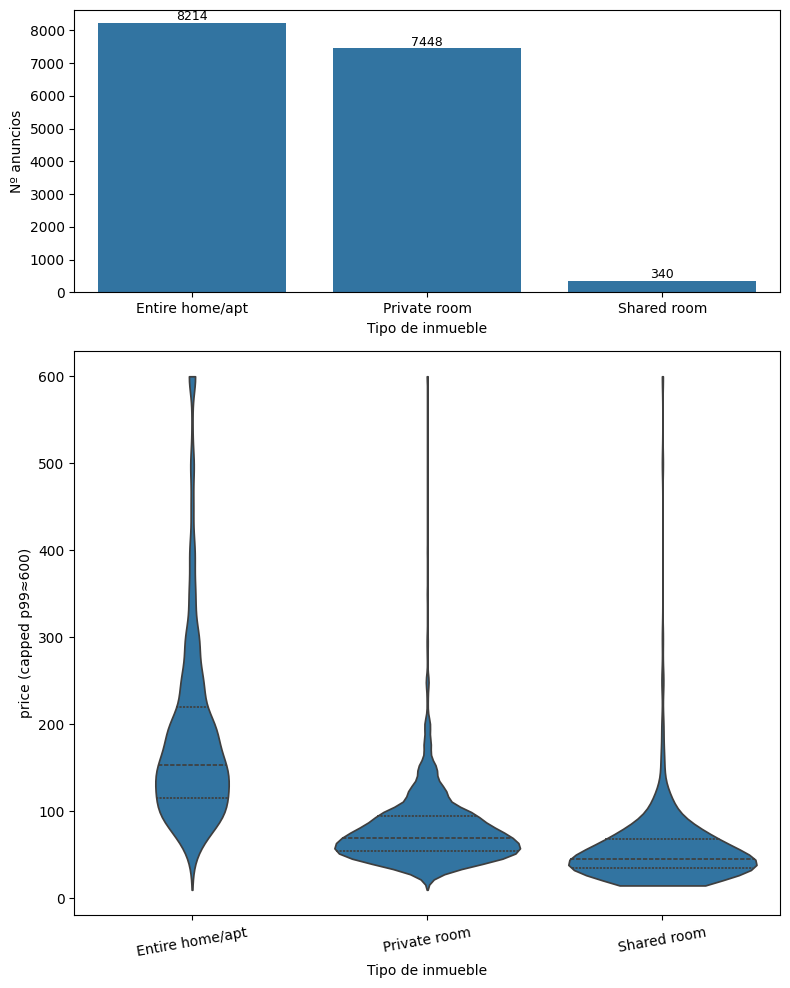

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios':[1, 2]})
sns.countplot(data=df, x='room_type', ax=axes[0])
axes[0].set_xlabel('Tipo de inmueble')
axes[0].set_ylabel('Nº anuncios')
axes[0].bar_label(axes[0].containers[0], padding=0, fontsize=9)

# cap a p99 para evitar los precios altos aplaste el violín
p99 = df['price'].quantile(0.99)
x = df['room_type']
y = np.minimum(df['price'].to_numpy(), p99)

sns.violinplot(x=x, y=y, inner='quartile', cut=0, ax=axes[1])
axes[1].set_xlabel('Tipo de inmueble')
axes[1].set_ylabel(f'price (capped p99≈{p99:.0f})')
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.show()

#### Observaciones

>Con el grafico anterior podemos ver que según el tipo de inmueble los precios varian. Aplicamos un capped para evitar los outlier que no dejan visualizar bien nuestro violín.

### Variables Univariante Numérica

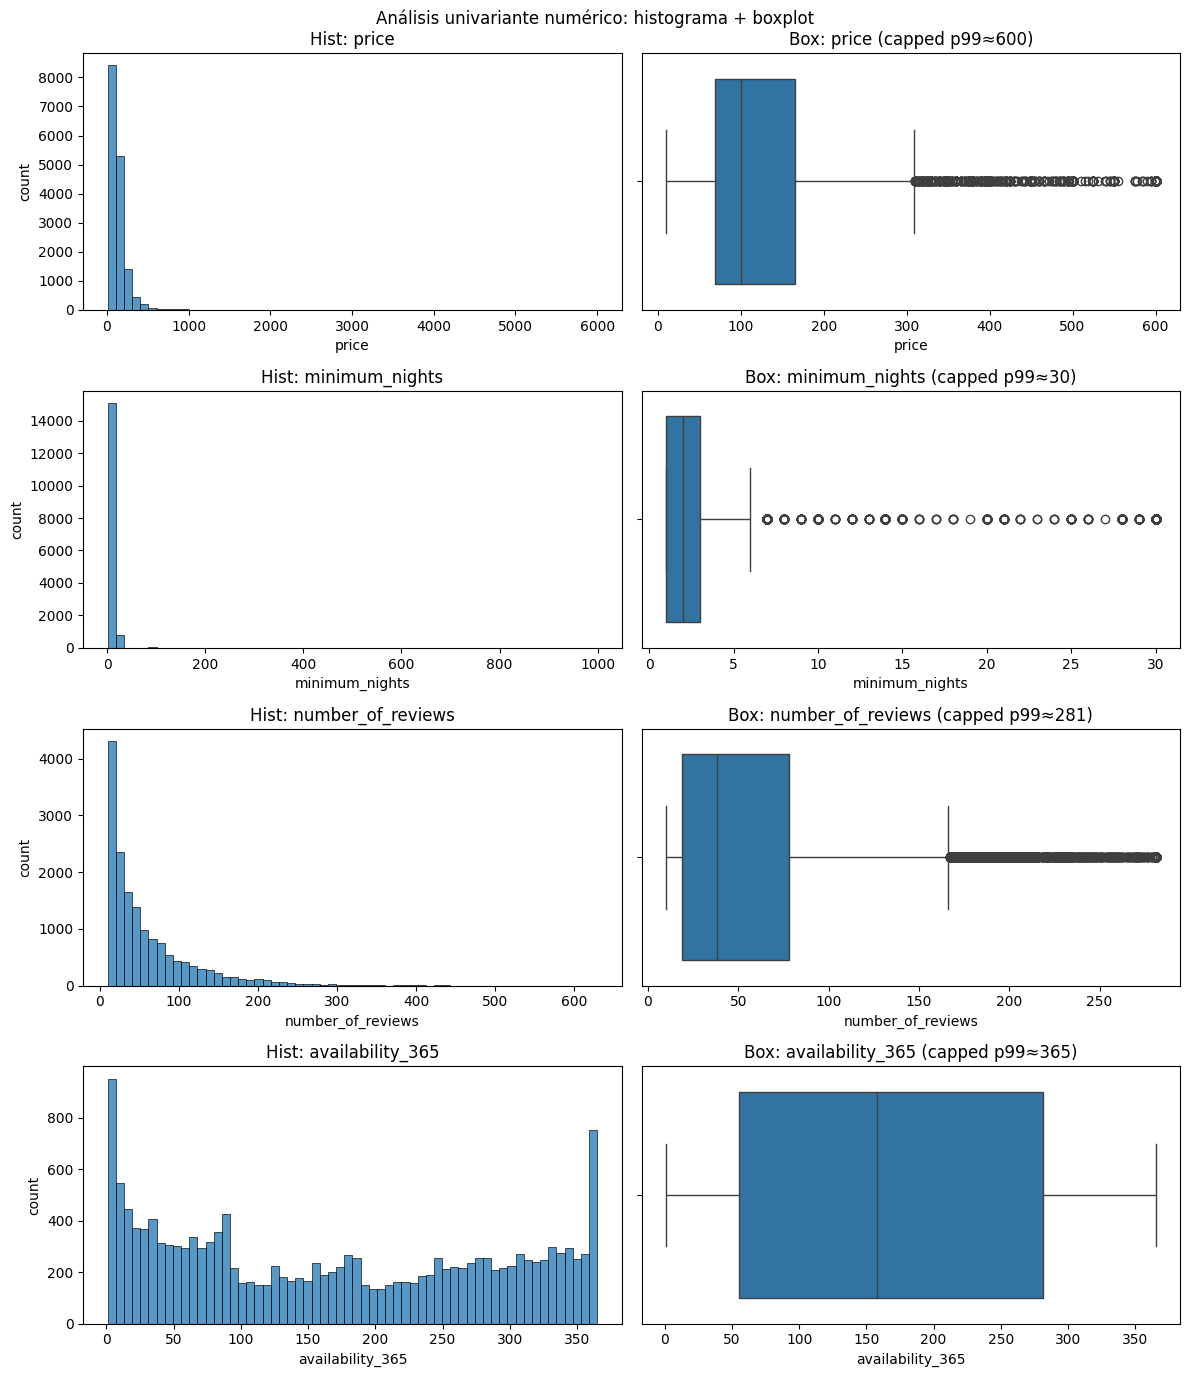

In [15]:
var_univ_num = ['price','minimum_nights','number_of_reviews','availability_365']

# cap 99% por variable (sólo a efectos de visualización)
p99_map = {foo: df[foo].quantile(0.99) for foo in var_univ_num}

fig, axes = plt.subplots(len(var_univ_num), 2, figsize=(12, 14))
fig.suptitle('Análisis univariante numérico: histograma + boxplot')

for i, col in enumerate(var_univ_num):
    # Histograma (Dato sin cap)
    if i < 4:
        sns.histplot(df[col], bins=60, ax=axes[i, 0])
        axes[i, 0].set_title(f'Hist: {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('count')
        # Boxplot (capado p99 para legibilidad)
        y_box = np.minimum(df[col].to_numpy(), p99_map[col])
        sns.boxplot(x=y_box, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box: {col} (capped p99≈{p99_map[col]:.0f})')
        axes[i, 1].set_xlabel(col)
    else:
        sns.histplot(df[col], bins=60, ax=axes[i, 0])
        axes[i, 0].set_title(f'Hist: {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('count')

        y_box = df[col].to_numpy()
        sns.boxplot(x=y_box, ax=axes[i, 1])
        axes[i, 1].set_title(f'Box: {col}')
        axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

#### Observaciones

>Podemos ver que nuestras variable en el histograma se tienden a concentar en un solo lugar, para poder visualizar mejor los datos hemos decidido poner un boxplot con un capped al 99%, asi evitamos los outliers momentaneamente para ver donde se agrupan nuestro mayor numero de variables. 
>
>En precios notamos que hay en el histograma outliners que llegan a los 10000, pero gracias al boxplot con capped notamos que la mayor concentracion esta entre los 80 y 180 aproximadamente.
>En cuanto a las noches minimas venos que existen valores de hasta 1200, pero la mayor concentracion esta entre 1 y 4.
>
>En cuanto a numero de reviews aunque hay algunos que abarcan valores sobre los 600 observamos que la mayoria estan entre 1 y 50
>
>En cuanto a reviews por mes tenemos que hay hasta 60, pero la concentracion de variables esta entre 0.5 y 2.8 aproximadamente.
>
>
>Finalmente tenemos la disponibilidad, tenemos desde 1 hasta 365 (los dias del año 2019) en este caso el histograma nos muestra una dispercion de referencia muy buena, no usaremos capped para poder ver este boxplot que nos muestra claramente que hay una acumulacion de datos entre 50 y 290 aproximadamente.

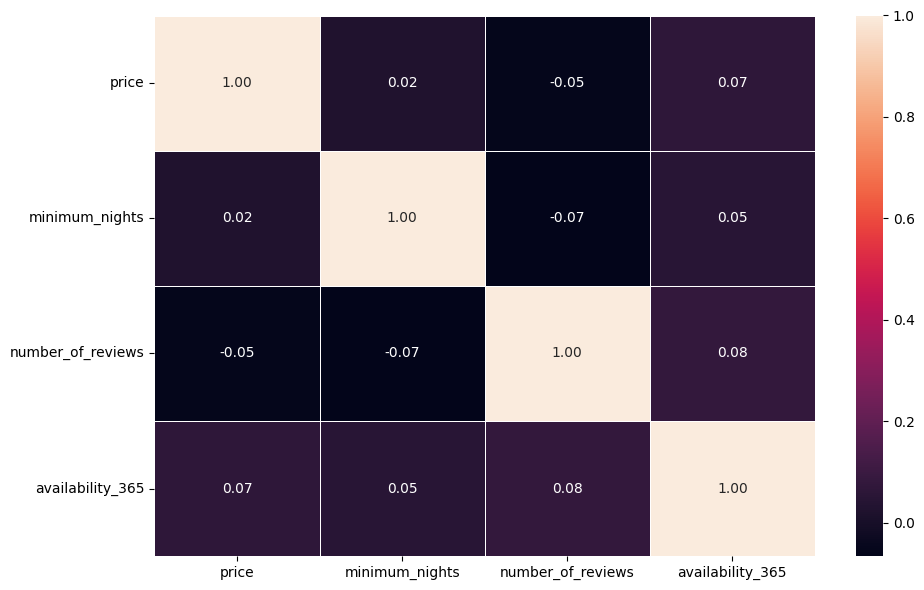

In [16]:
corr = df[["price", "minimum_nights", "number_of_reviews", "availability_365"]].corr()

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

#### Observaciones

>Tenemos una correlacion entre las reviews por mes y el numero de las reviews. Tiene mucho sentido ya que el reviews por mes deberia ser una media que sube cuando suben las reviews generales suben. De resto, nada que este directamente relacionado al precio.


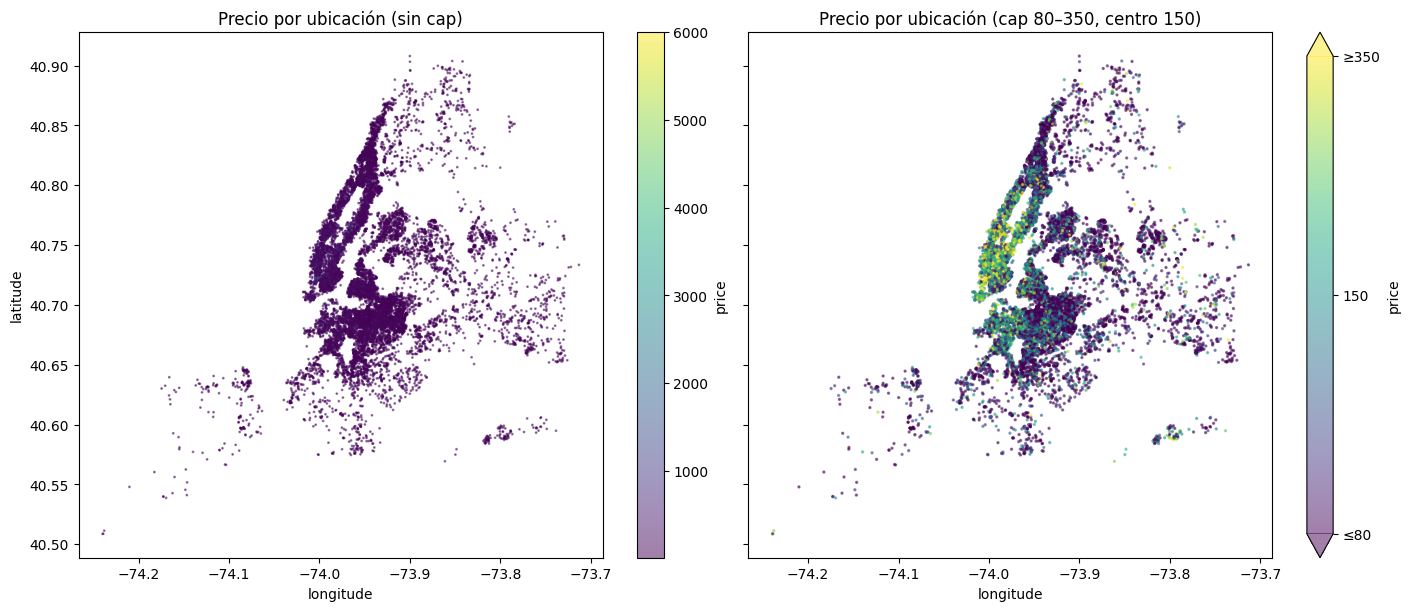

In [17]:
norm = TwoSlopeNorm(vmin=80, vcenter=150, vmax=350)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True, constrained_layout=True)

# Scatter sin cap 
foo = axes[0].scatter(df['longitude'], df['latitude'],c=df['price'], s=1, alpha=0.5)
bat = fig.colorbar(foo, ax=axes[0])
bat.set_label('price')
axes[0].set_title('Precio por ubicación (sin cap)')
axes[0].set_xlabel('longitude'); axes[0].set_ylabel('latitude')


sc2 = axes[1].scatter(
    df['longitude'], df['latitude'],
    c=df['price'], s=2, alpha=0.5,
    cmap='viridis',   
    norm=norm
)
cb2 = fig.colorbar(sc2, ax=axes[1], extend='both')
cb2.set_label('price')
cb2.set_ticks([80, 150, 350])
cb2.set_ticklabels(['≤80', '150', '≥350'])
axes[1].set_title('Precio por ubicación (cap 80–350, centro 150)')
axes[1].set_xlabel('longitude')

plt.show()

### Observaciones
>
>Notamos que con un cap visualizamos que segun la latitud y longitud mientras mas centricos los lugares el precio es mas alto. en el resto de las zonas los precios son entre 80 y 150.

## Paso 6: Ingeniería de características

### Factorize

In [18]:
df["room_type_fact"] = pd.factorize(df['room_type'])[0]
df[["room_type", "room_type_fact"]].head(5)

,room_type,room_type_fact
0,Entire home/apt,0
1,Entire home/apt,0
2,Entire home/apt,0
3,Private room,1
4,Entire home/apt,0


In [19]:
type_room_rules = {row['room_type']: row['room_type_fact'] for _, row in df.iterrows()}
type_room_rules

{'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}

In [20]:
with open('../models/type_room_rules.json', 'w') as file:
    json.dump(type_room_rules, file)

df.drop(["room_type"],
              axis=1, inplace=True)


### Outliers

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,16002.0,40.726807,0.057531,40.50868,40.68581,40.719895,40.763260,40.90804
longitude,16002.0,-73.945634,0.052618,-74.23986,-73.98112,-73.951600,-73.927873,-73.71299
price,16002.0,138.095363,140.288447,10.00000,69.00000,100.000000,165.000000,6000.00000
minimum_nights,16002.0,4.651606,15.246373,1.00000,1.00000,2.000000,3.000000,999.00000
number_of_reviews,16002.0,59.952881,60.036718,10.00000,19.00000,38.000000,78.000000,629.00000
availability_365,16002.0,168.514123,120.197413,1.00000,55.00000,158.000000,281.000000,365.00000
room_type_fact,16002.0,0.507937,0.540786,0.00000,0.00000,0.000000,1.000000,2.00000


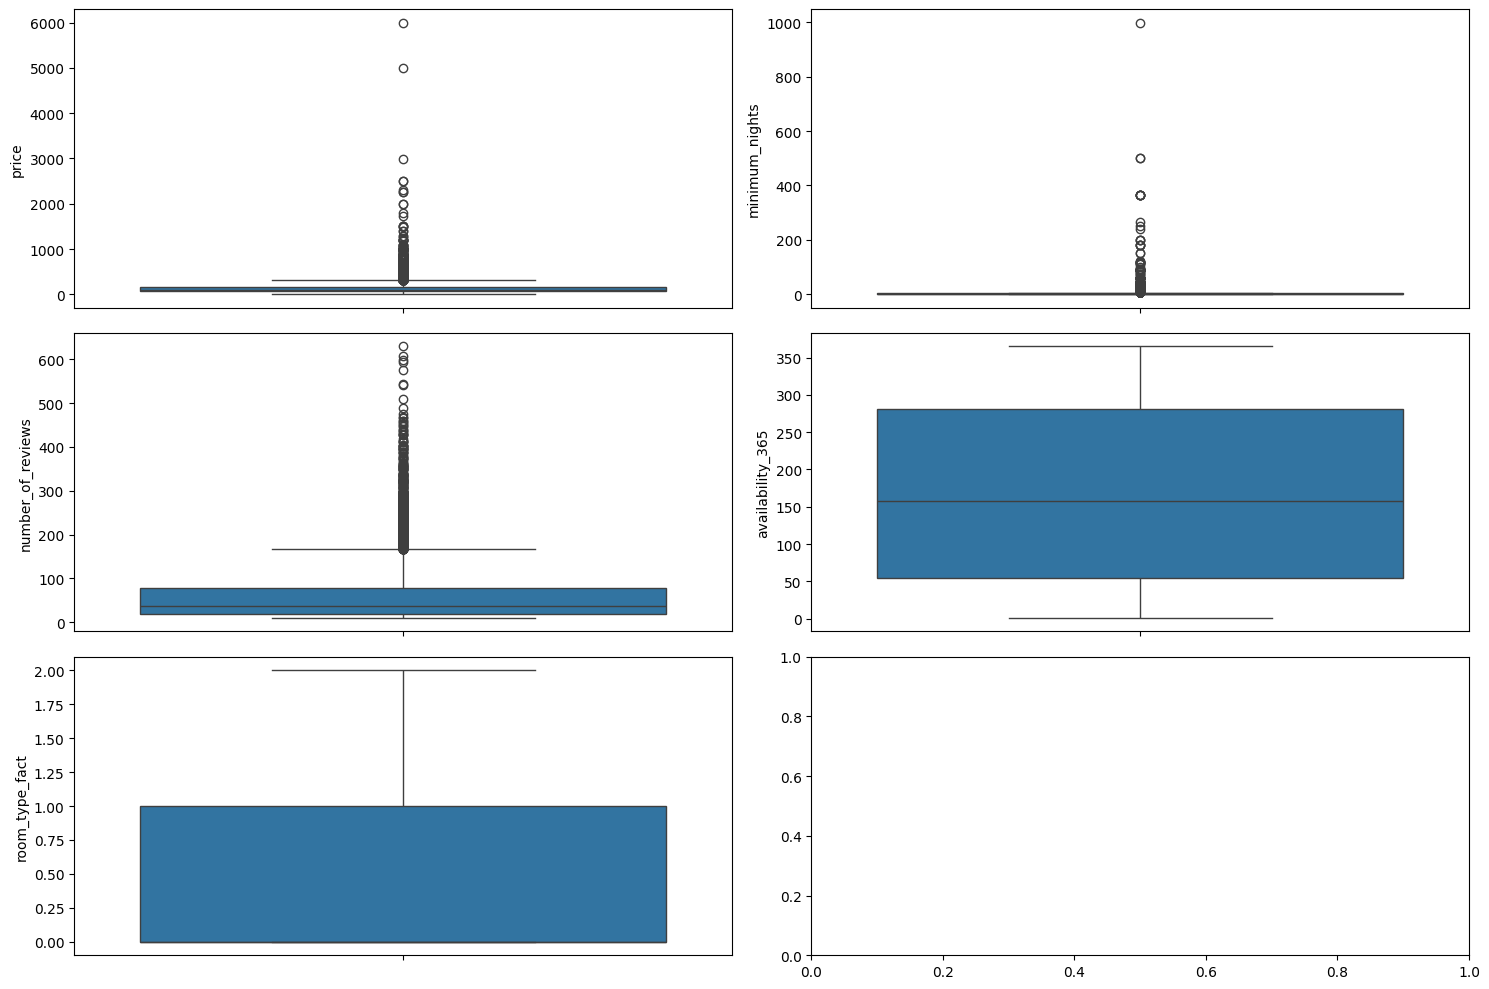

In [22]:
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="price")
sns.boxplot(ax=axis[0, 1], data=df, y="minimum_nights")
sns.boxplot(ax=axis[1, 0], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 1], data=df, y="availability_365")
sns.boxplot(ax=axis[2, 0], data=df, y="room_type_fact")


plt.tight_layout()
plt.show()

In [23]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
super_outliners =["price", "minimum_nights", "number_of_reviews"]
q1 = df[super_outliners].quantile(0.25)
q3 = df[super_outliners].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = (q1 - 1.5 * iqr).clip(lower=0)
upper_limit = q3 + 1.5 * iqr

limits = pd.DataFrame({
    "Q1": q1.round(2),
    "Q3": q3.round(2),
    "IQR": iqr.round(2),
    "Lower": lower_limit.round(2),
    "Upper": upper_limit.round(2),
})

limits

,Q1,Q3,IQR,Lower,Upper
price,69.0,165.0,96.0,0.0,309.0
minimum_nights,1.0,3.0,2.0,0.0,6.0
number_of_reviews,19.0,78.0,59.0,0.0,166.5


In [24]:
summary = pd.DataFrame([{"price>309": (df["price"]>309).sum(),
                         "min_nights>6.0": (df["minimum_nights"]>6.0).sum(),
                         "reviews>166.5": (df["number_of_reviews"]>166.5).sum()}])

summary

,price>309,min_nights>6.0,reviews>166.5
0,863,1575,1012


> #### Observaciones
>
> Aunque hay muchas cosas que podemos considerar quitar me parece que todos son datos importantes para el DF


### Análisis de valores faltantes

In [25]:
df.isnull().sum() / df.shape[0]

latitude             0.0
longitude            0.0
price                0.0
minimum_nights       0.0
number_of_reviews    0.0
availability_365     0.0
room_type_fact       0.0
dtype: float64

> #### Observaciones
>
> nada que borrar en nuestro DF

### Inferencia de nuevas características

> #### Observaciones
>
> nada que juntar en nuestro DF

## Paso 7: Split 

In [26]:
df.shape

(16002, 7)

In [27]:
X = df.drop("price", axis=1)
y = df["price"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [28]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type_fact
14322,40.66402,-73.98282,5,29,74,0
7468,40.73922,-73.92650,1,76,76,1
531,40.67110,-73.95231,2,20,98,1
7350,40.67748,-74.00989,2,132,244,0
468,40.70163,-73.90867,1,19,311,1
...,...,...,...,...,...,...
1726,40.78622,-73.97586,30,23,89,0
2885,40.80645,-73.95804,5,25,198,1
9336,40.68340,-73.92035,2,63,102,1
12563,40.76907,-73.98814,2,52,192,1


In [29]:
X_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'availability_365', 'room_type_fact'],
      dtype='object')

In [30]:
y_test.shape

(3201,)

In [31]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type_fact
14322,40.66402,-73.98282,5,29,74,0
7468,40.73922,-73.92650,1,76,76,1
531,40.67110,-73.95231,2,20,98,1
7350,40.67748,-74.00989,2,132,244,0
468,40.70163,-73.90867,1,19,311,1


In [32]:
y_train

14322    285
7468      70
531       99
7350      85
468       55
        ... 
1726      99
2885      85
9336      69
12563     99
11562     74
Name: price, Length: 12801, dtype: int64

## Paso 8: Scaling & Encoding

### Scaling - Escalado de valores

In [33]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ['latitude', 'longitude', 'minimum_nights',
                'number_of_reviews', 'availability_365',
                  'room_type_fact']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type_fact
0,0.613331,0.486059,0.000000,0.056543,0.972527,0.0
1,0.441857,0.531630,0.000000,0.420032,0.530220,0.0
2,0.598432,0.502705,0.002004,0.103393,0.351648,0.0
3,0.641551,0.483857,0.001002,0.678514,0.601648,0.5
4,0.512720,0.473532,0.000000,0.242326,0.513736,0.0


### Encoding - Codificación de variables categóricas


In [34]:
# 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# 1. Creamos las instancias del encoder
label_encoder_room_type_fact = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_room_type_fact.fit(X_train['room_type_fact'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['room_type_fact_le'] = label_encoder_room_type_fact.transform(X_train['room_type_fact'])
X_test_cat_le['room_type_fact_le'] = label_encoder_room_type_fact.transform(X_test['room_type_fact'])



X_train_cat_le.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type_fact,room_type_fact_le
14322,40.66402,-73.98282,5,29,74,0,0
7468,40.73922,-73.92650,1,76,76,1,1
531,40.67110,-73.95231,2,20,98,1,1
7350,40.67748,-74.00989,2,132,244,0,0
468,40.70163,-73.90867,1,19,311,1,1


#### One-Hot Encoding

In [35]:
# Genero una lista con los nombres de las columnas categóricas
cat_variables = ["room_type_fact"]

# Creamos la instancia del encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Entrenamos el encoder con los datos de entrenamiento (ajustamos)
onehot_encoder.fit(X_train[cat_variables])

# Aplicamos el encoder en el conjunto de entrenamiento: X_train
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

# Aplicamos el encoder en el conjunto de test: X_test
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,room_type_fact_0,room_type_fact_1,room_type_fact_2
14322,1.0,0.0,0.0
7468,0.0,1.0,0.0
531,0.0,1.0,0.0
7350,1.0,0.0,0.0
468,0.0,1.0,0.0
